## Zomato is a restaurant search and discovery service that serves in 83 cities in India 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('/kaggle/input/zomato_restaurants_in_India.csv',engine="python")
# drop duplicate rows using res_id as it is unique for each restaurant
df.drop_duplicates(subset='res_id',inplace=True)

### Quick info on each columns

In [3]:
# Quick info on each columns
df.head()

print("Dataframe shape")
print(df.shape)

df.isnull().sum()

df.city.nunique()
# there are 99 cities

df.city_id.nunique()
# with 83 city IDs

print(df.delivery.unique())

print(df.takeaway.unique())

print(df.opentable_support.unique())

Dataframe shape
(55568, 26)
[-1  1  0]
[-1]
[ 0. nan]


Quick observation:

There are 55568 unique restaurants available.

There are few null values in address, zipcode, cuisines, timings, opentable_support columns.

The delivery, opentable_support, takeaway columns holds values of no use.

## Which city has more restaurants ?

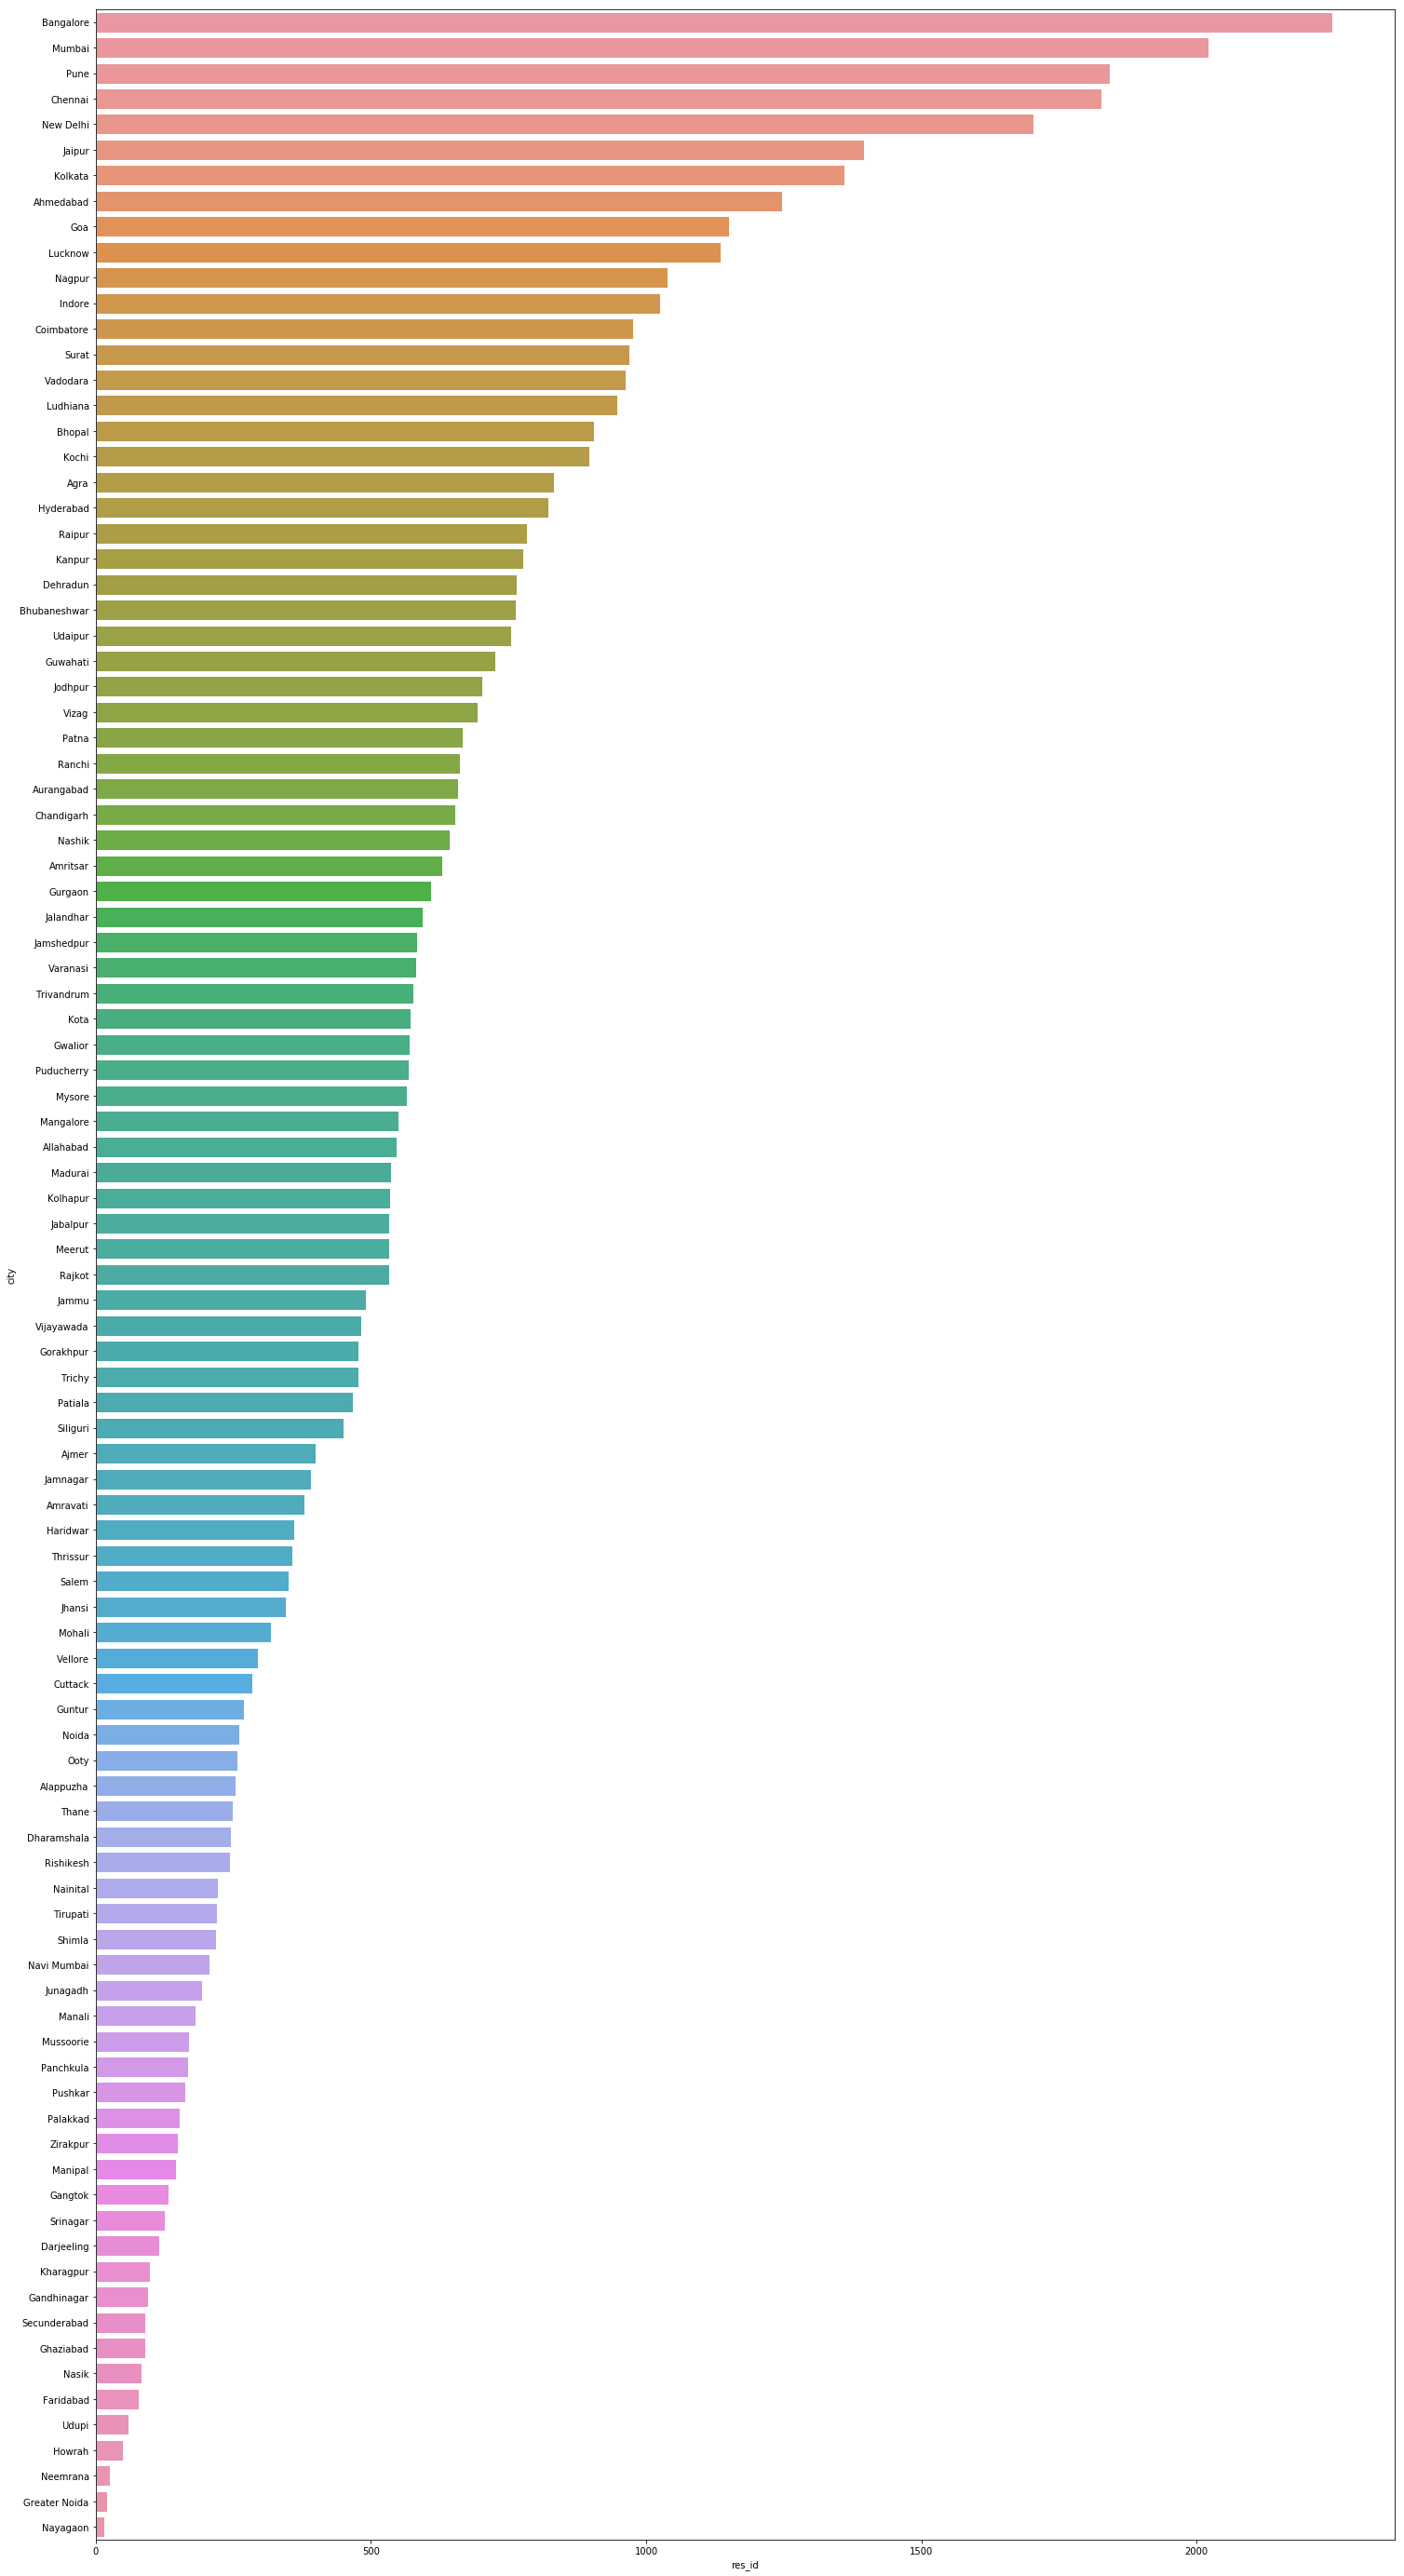

In [4]:
city_df = df.loc[:,['res_id','city']]
res_by_city = city_df.groupby('city').count()
res_by_city.sort_values('res_id',ascending=False,inplace=True)
fig,axes =  plt.pyplot.subplots()
fig.set_size_inches(25,50)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 20,'axes.labelsize':42})
res_by_city_plot = sns.barplot(x='res_id',y=res_by_city.index,data=res_by_city,ax=axes)

In [5]:
res_by_city.head()

,res_id
city,
Bangalore,2247
Mumbai,2022
Pune,1843
Chennai,1827
New Delhi,1704


Bangalore has more restaurants in india followed by mumbai, pune, chennai and new delhi.

## Lets see the distribution of restaurant ratings

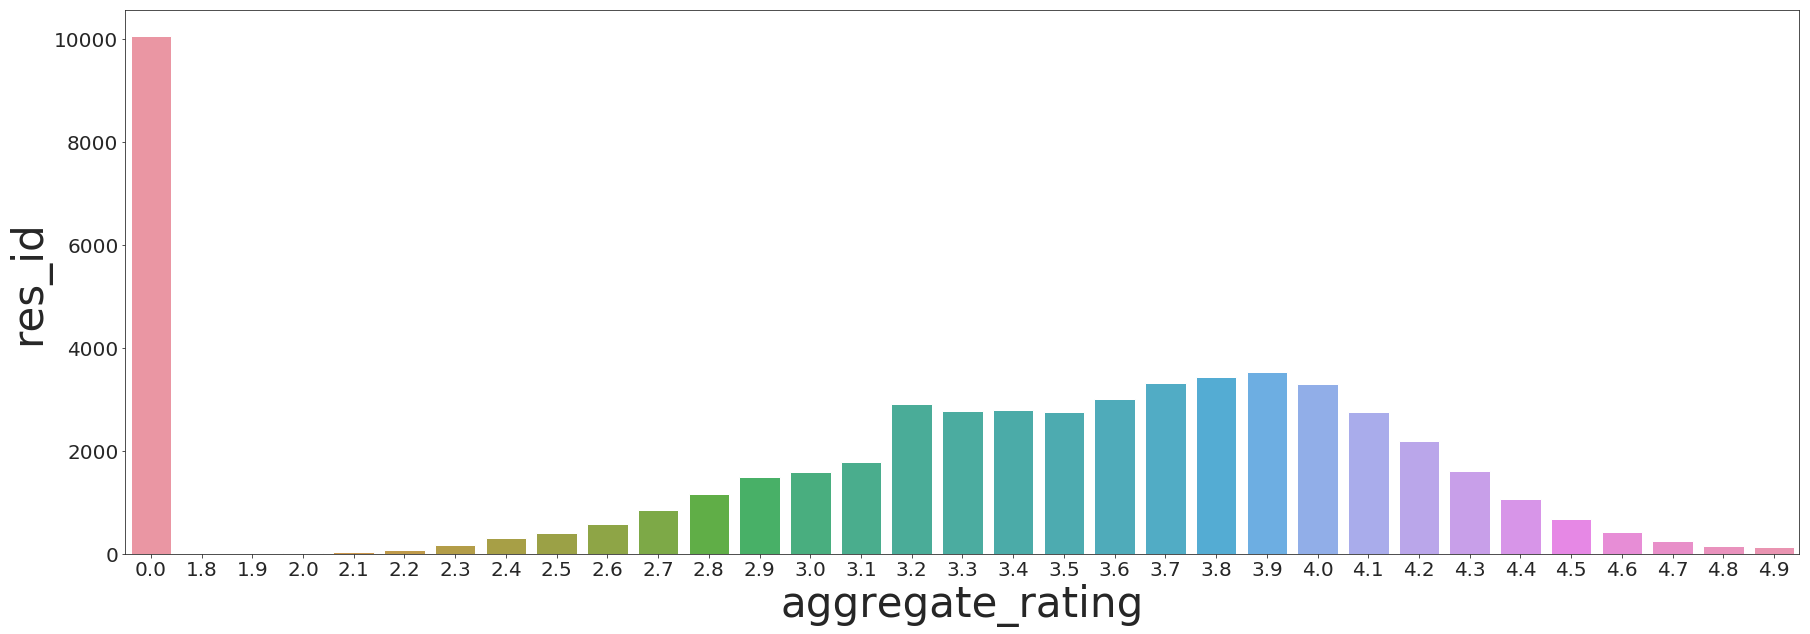

In [6]:
res_by_ratings = df.loc[:,['res_id','aggregate_rating']]
res_by_ratings = res_by_ratings.groupby('aggregate_rating').count()
res_by_ratings.sort_values('res_id',ascending=False,inplace=True)
res_by_ratings.head()
fig,axes =  plt.pyplot.subplots()
fig.set_size_inches(30,10)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 28,'axes.labelsize':42})
sns.barplot(x=res_by_ratings.index,y=res_by_ratings.res_id,data=res_by_ratings,ax=axes)

#### Most of the restaurants are unrated and most rated restaurants falls under 3.2-4.0 rating

## Does cost affects restaurant rating?

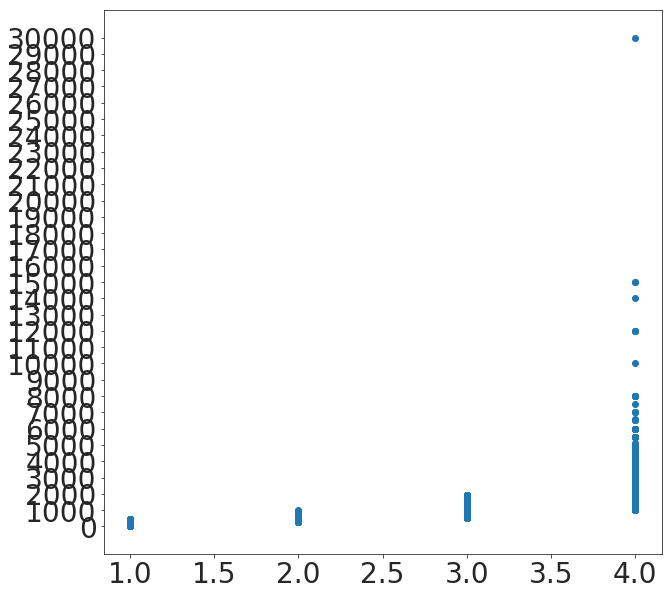

In [7]:
price_category = df.loc[:,['res_id','price_range','average_cost_for_two']]
fig,axes =  plt.pyplot.subplots()
fig.set_size_inches(10,10)
plt.rcParams.update({'font.size': 14,'axes.labelsize':14})
axes.yaxis.set_ticks(np.arange(0, np.max(price_category["average_cost_for_two"])+1, 1000))
axes.scatter(x='price_range',y='average_cost_for_two',data=price_category)

Lets have a closer look at the graph

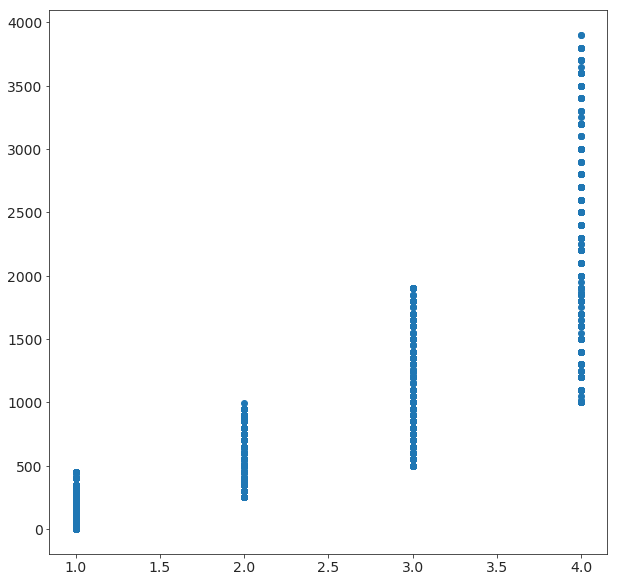

In [8]:
price_category = price_category[price_category['average_cost_for_two']<4000]
fig,axes =  plt.pyplot.subplots()
fig.set_size_inches(10,10)
#axes.yaxis.set_ticks(np.arange(0, np.max(price_category["average_cost_for_two"])+1, 1000))
axes.scatter(x='price_range',y='average_cost_for_two',data=price_category)

#### Its evident that restaurants with ratings greater than 3.0 costs more than Rs.500 for two.

In [9]:
cost_vs_ratings = df.loc[:,['rating_text','price_range','city']]
cost_vs_ratings.groupby('rating_text').count()
cost_vs_ratings = cost_vs_ratings[cost_vs_ratings['rating_text'].isin(['Average','Excellent','Good','Poor','Very Good'])]

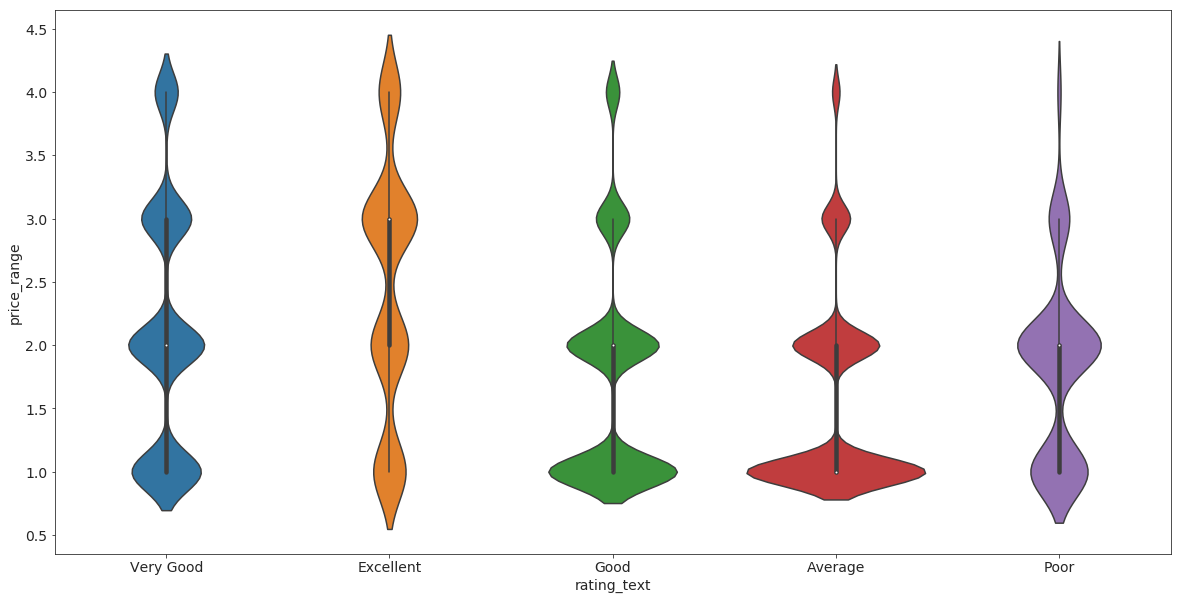

In [10]:
fig,axes = plt.pyplot.subplots()
fig.set_size_inches(20,10)
#sns.set_style('ticks')
sns.violinplot(x='rating_text',y='price_range',data=cost_vs_ratings)

Cheap restaurants are rated often with average, good rating text and costlier restaurants are rated with high number of Excellent and Very good rating text.

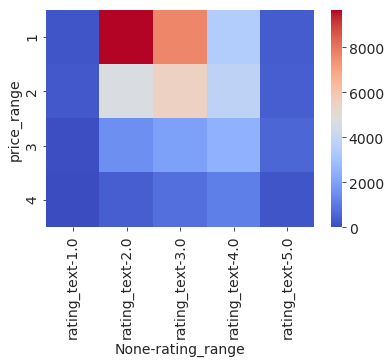

In [11]:
cost_vs_ratings = df.loc[:,['rating_text','price_range','res_id']]
cost_vs_ratings['rating_range'] = cost_vs_ratings['rating_text'].map({'Poor':1,'Average':2,'Good':3,'Very Good':4,'Excellent':5})
cost_vs_ratings.drop('res_id',axis=1,inplace=True)
sns.heatmap(cost_vs_ratings.pivot_table(index=['price_range'],columns="rating_range",aggfunc="count"),cmap="coolwarm")

## Distribution of restaurants by price range

In [12]:
df.price_range.value_counts(dropna=True)
res_by_cost_for_two = df.loc[:,['res_id','price_range']]
res_by_cost_for_two = res_by_cost_for_two.groupby('price_range',as_index=False).count()
res_by_cost_for_two.sort_values('res_id',ascending=False,inplace=True)
res_by_cost_for_two

,price_range,res_id
0,1,28818
1,2,16582
2,3,7370
3,4,2798


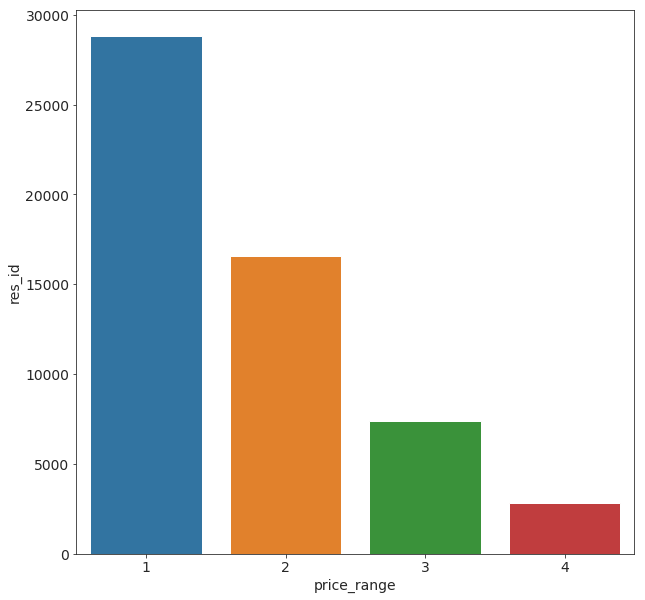

In [13]:
fig,axes =  plt.pyplot.subplots()
fig.set_size_inches(10,10)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 20,'axes.labelsize':20})
sns.barplot(x=res_by_cost_for_two.price_range,y=res_by_cost_for_two.res_id,data=res_by_cost_for_two,ax=axes)

## Lets have a look at the costliest restaurants 

In [14]:
costliest_res = df[df['average_cost_for_two']>4000].sort_values('average_cost_for_two',ascending=False)
costliest_res.shape

(158, 26)

### These are the restaurants which costs more than 4k for two.

### Lets see the distribution of the restaurants across cities.

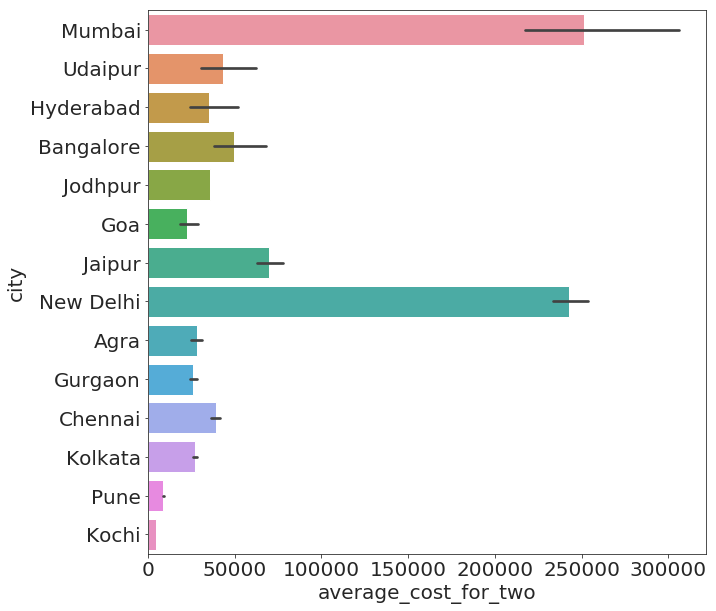

In [15]:
fig,axes =  plt.pyplot.subplots()
fig.set_size_inches(10,10)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 20,'axes.labelsize':20})
sns.barplot(x="average_cost_for_two",y="city",data=costliest_res,estimator=sum,ax=axes)

So mumbai and new delhi has more costliest restaurants compared to other cities.
Lets have a detailed distribution.

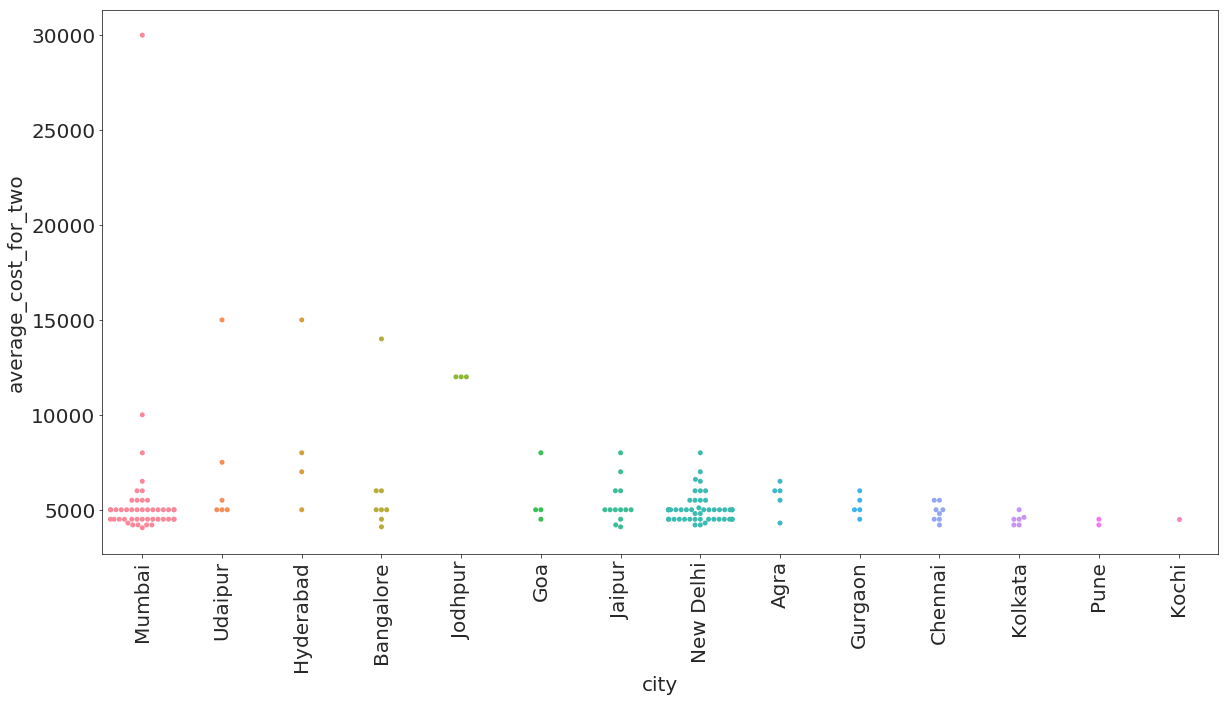

In [16]:
fig,axes = plt.pyplot.subplots()
fig.set_size_inches(20,10)
plt.pyplot.xticks(rotation=90)
sns.swarmplot(y="average_cost_for_two",x="city",data=costliest_res)

## Lets see the distribution of restaurants by ratings

In [17]:
ratings_by_city = df.loc[:,['city','aggregate_rating']].groupby(by=['city']).agg(['mean','count'])
ratings_by_city = ratings_by_city.stack(level=0)
ratings_by_city.reset_index(inplace=True)
ratings_by_city.sort_values('count',ascending=False,inplace=True)

List of cities sorted by restaurants count when plotted against ratings

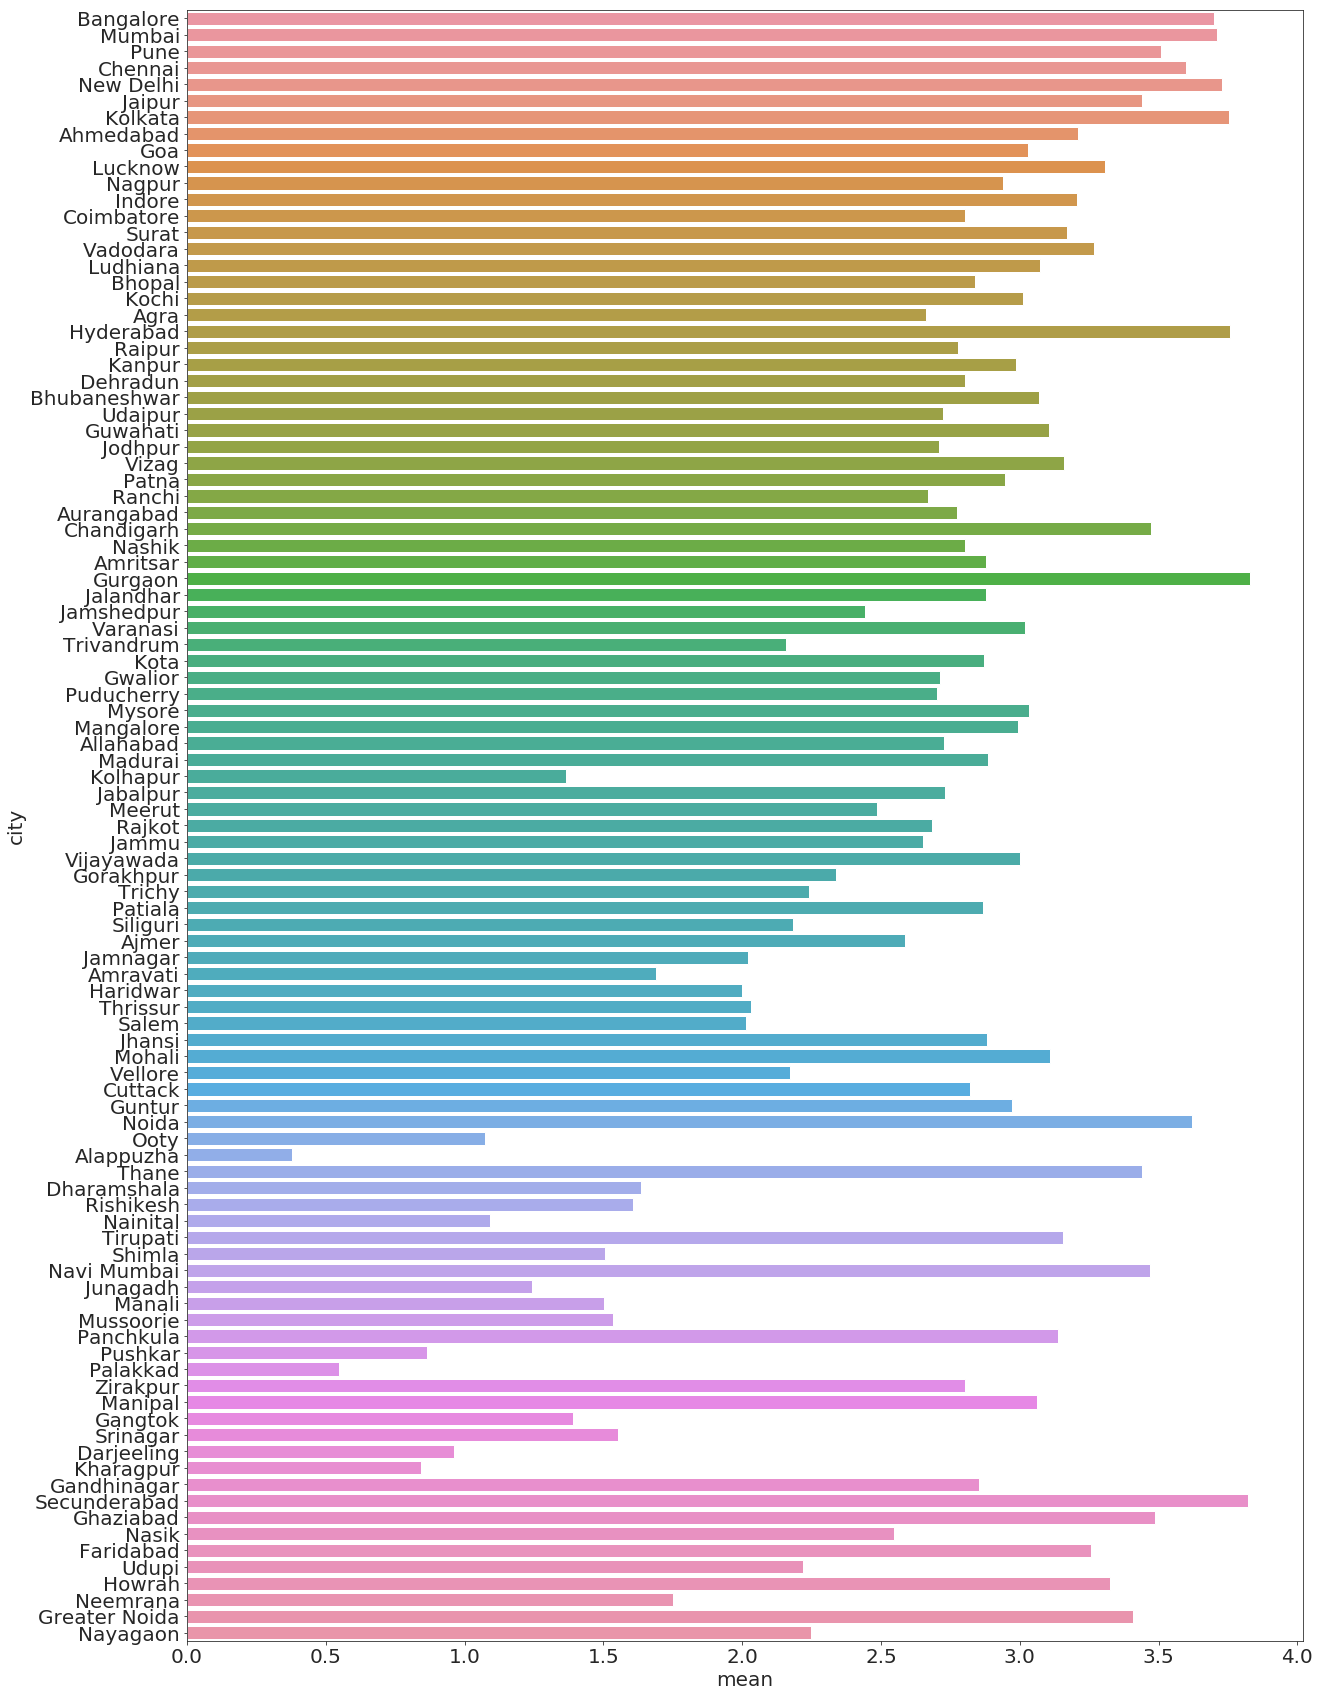

In [18]:
fig,axes = plt.pyplot.subplots()
fig.set_size_inches(20,30)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 18,'axes.labelsize':20})
sns.barplot(y="city",x="mean",data=ratings_by_city,ax=axes)

## Lets have a look at cuisines offered by restaurants

In [19]:
cuisines = set()
def cuisinesSeperator(data):
    for i in data.split(','):
        cuisines.add(i.strip())
    
df.cuisines.dropna().apply(cuisinesSeperator)
print(len(cuisines))

133


There are 133 unique cuisines offered by restaurants in India.

Deepdiving a little bit on cuisines.

In [20]:
cuisineCount = {}
def cuisineCountMap(data):
    for i in data.split(','):
        if(i.strip() in cuisineCount):
            cuisineCount[i.strip()] = cuisineCount[i.strip()] +1
        else:
            cuisineCount[i.strip()] = 1 
df.cuisines.dropna().apply(cuisineCountMap)
cuisineCount

{'North Indian': 19226,
 'South Indian': 6381,
 'Mithai': 3144,
 'Street Food': 3715,
 'Desserts': 7064,
 'Mughlai': 2034,
 'Rolls': 877,
 'Chinese': 12724,
 'Fast Food': 11988,
 'Bakery': 4813,
 'Continental': 5076,
 'Italian': 3673,
 'Pizza': 2461,
 'Cafe': 4252,
 'Burger': 1852,
 'Wraps': 177,
 'Beverages': 6754,
 'Rajasthani': 295,
 'Mexican': 747,
 'Healthy Food': 679,
 'Sandwich': 1524,
 'Salad': 734,
 'Momos': 903,
 'Lebanese': 215,
 'Mediterranean': 327,
 'Thai': 719,
 'Gujarati': 412,
 'Indian': 499,
 'Finger Food': 1336,
 'European': 558,
 'Tea': 435,
 'Asian': 1096,
 'Bar Food': 183,
 'Kebab': 498,
 'Paan': 337,
 'Biryani': 3207,
 'Juices': 1143,
 'Ice Cream': 3053,
 'Japanese': 269,
 'Korean': 54,
 'Afghan': 114,
 'Awadhi': 63,
 'Hyderabadi': 159,
 'Lucknowi': 57,
 'Roast Chicken': 61,
 'Drinks Only': 39,
 'Coffee': 296,
 'American': 656,
 'BBQ': 444,
 'Maharashtrian': 539,
 'Modern Indian': 261,
 'Andhra': 347,
 'Konkan': 36,
 'Kerala': 633,
 'Sushi': 115,
 'Parsi': 38,
 '

## Lets analyse the distribution of cuisine

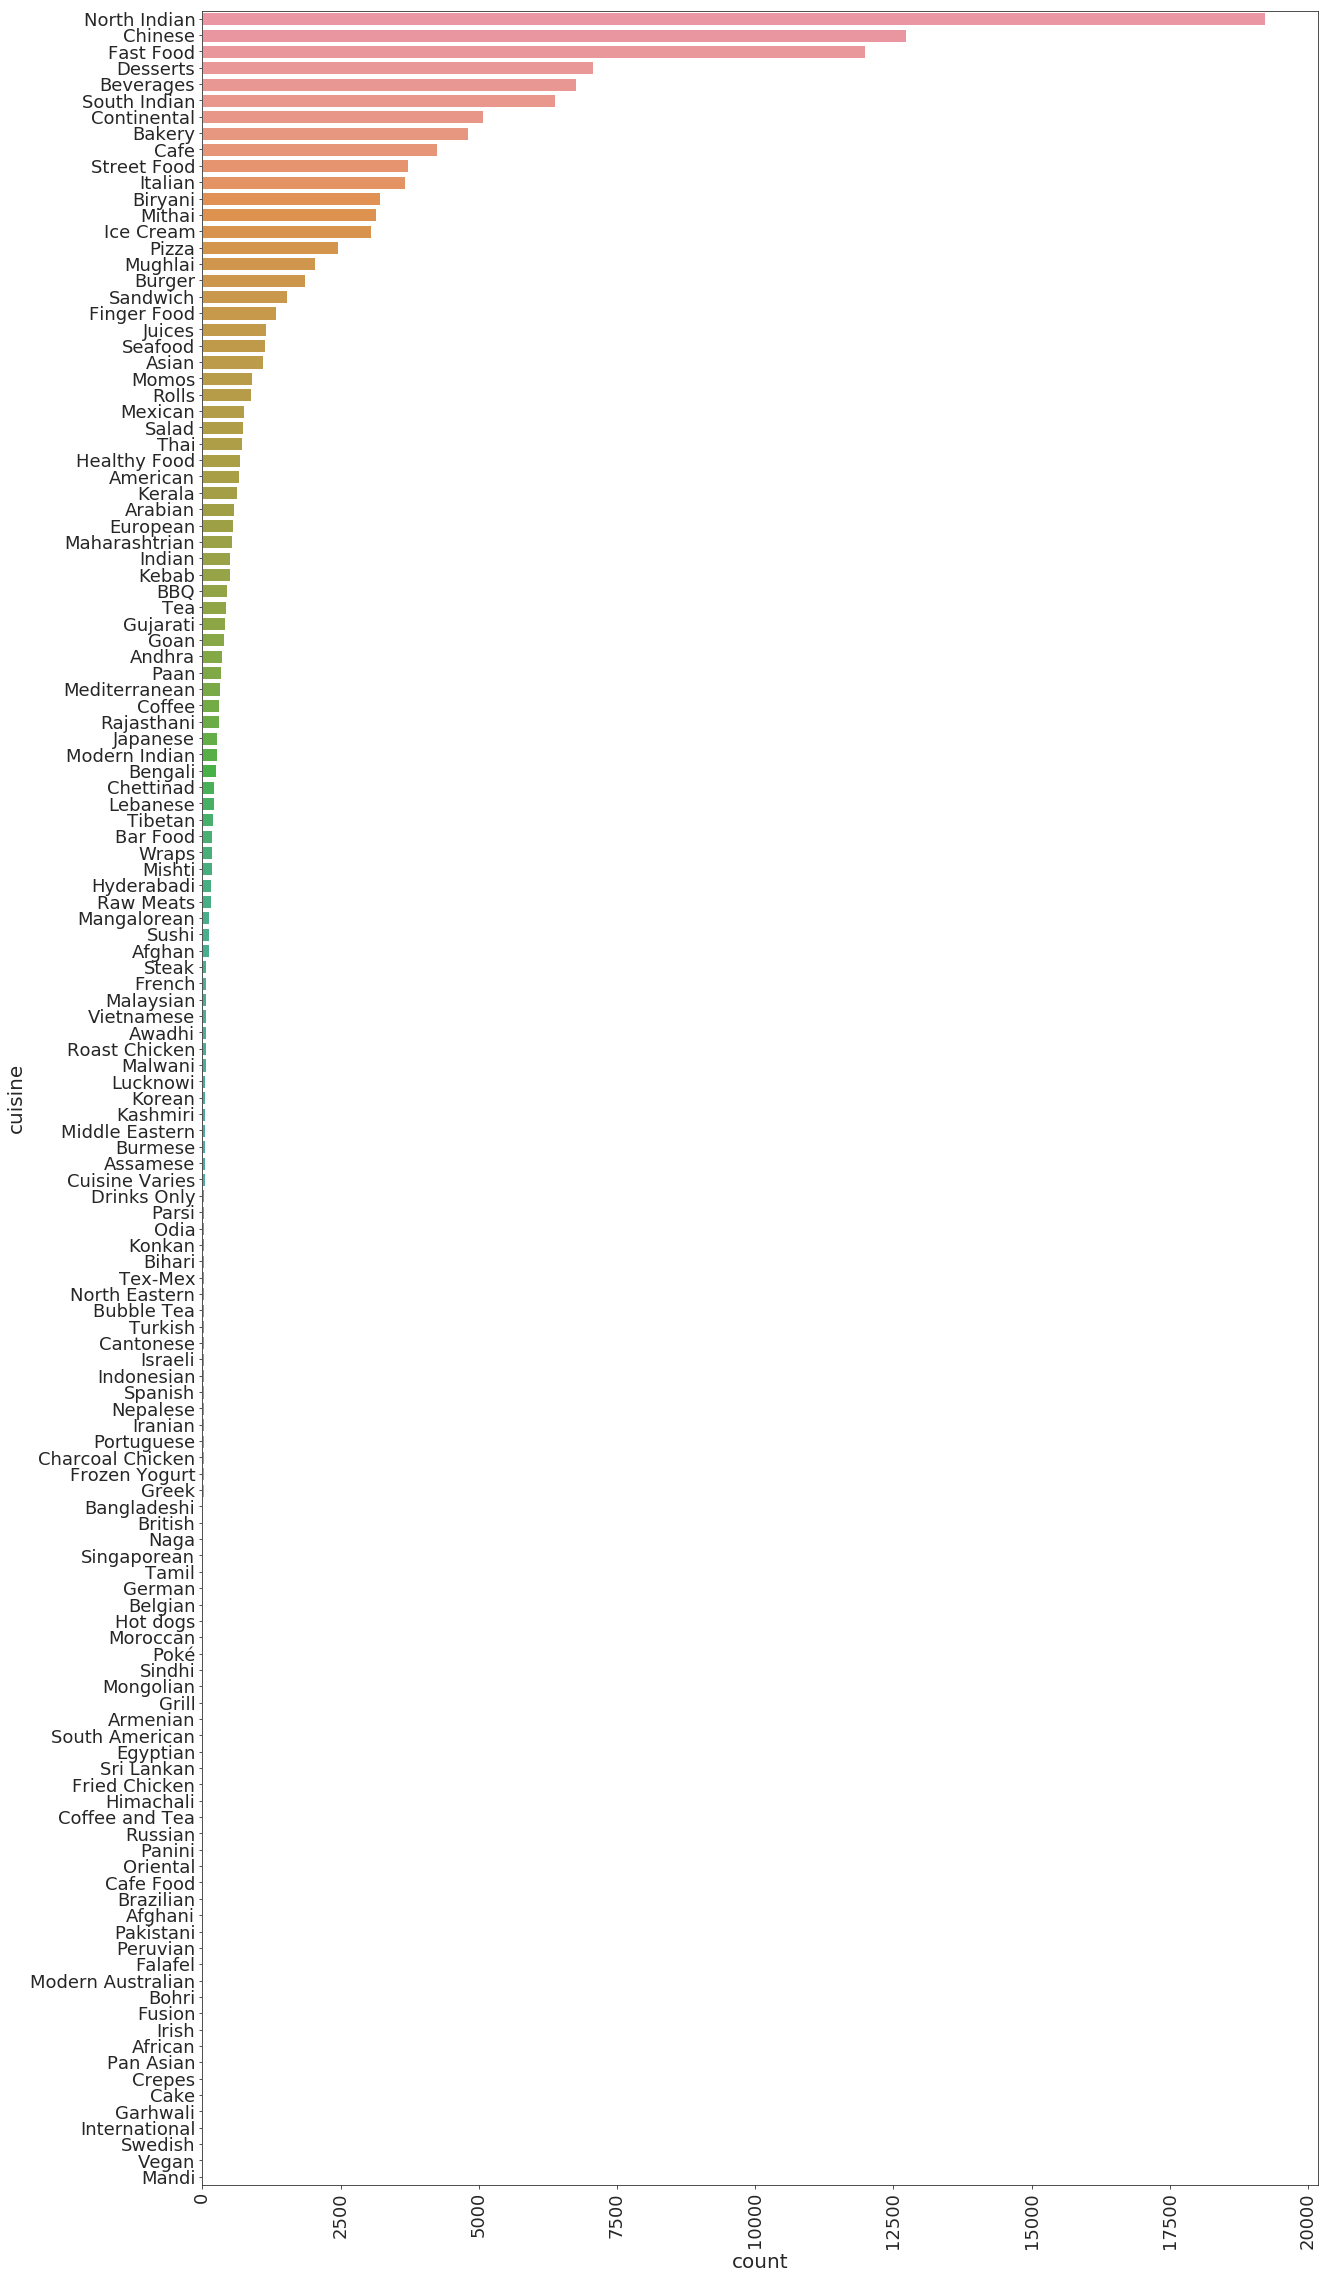

In [21]:
cuisinesCountDf = pd.DataFrame(list(cuisineCount.items()),columns=['cuisine','count'])
cuisinesCountDf.sort_values(by="count",ascending=False,inplace=True)
fig,axes = plt.pyplot.subplots()
fig.set_size_inches(20,40)
plt.pyplot.xticks(rotation=90)
plt.rcParams.update({'font.size': 20,'axes.labelsize':20})
sns.barplot(y="cuisine",x="count",data=cuisinesCountDf,ax=axes)

### It looks like north indian cuisine is distributed all over india followed by chinese, fast food and desserts

In [22]:
from wordcloud import WordCloud

In [23]:
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(cuisinesCountDf))

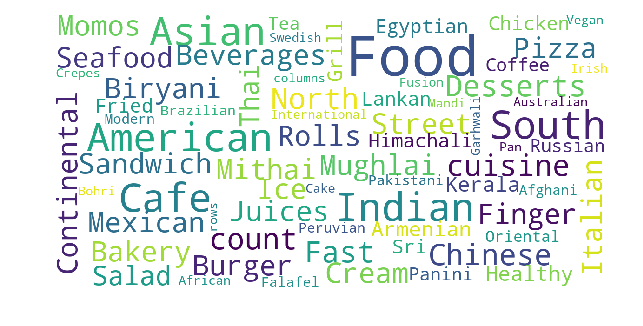

In [24]:
fig,axes = plt.pyplot.subplots()
fig.set_size_inches(10,20)
axes.axis('off')
axes.imshow(wordcloud)

## Lets see the distribution of cuisines by city

In [25]:
cuisineByCity = {}
def cuisine_by_city(data):
    city = data[0]
    cuisine = data[1]
    if city in cuisineByCity:
        for i in cuisine.split(','):
            if(i.strip() in cuisineByCity[city]):
                cuisineByCity[city][i.strip()] = cuisineByCity[city][i.strip()] +1
            else:
                cuisineByCity[city][i.strip()] = 1 
    else:
        cuisineByCity[city] = {}
        for i in cuisine.split(','):
            cuisineByCity[city][i.strip()] = 1
df[['city','cuisines']].dropna().apply(cuisine_by_city, axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
211077    None
211079    None
211080    None
211082    None
211083    None
211087    None
211093    None
211094    None
211095    None
211096    None
211097    None
211098    None
211102    None
211182    None
211705    None
211707    None
211708    None
211709    None
211712    None
211715    None
211716    None
211720    None
211879    None
211880    None
211881    None
211882    None
211925    None
211926    None
211940    None
211942    None
Length: 55098, dtype: object

In [26]:
cuisineByCity_df = []
for keys in cuisineByCity.keys():
    for k,v in cuisineByCity[keys].items():
        cuisineByCity_df.append((keys,k,v))
cuisineByCity_df = pd.DataFrame(cuisineByCity_df,columns=['city','cuisine','count'])

In [27]:
cuisineByCity_df.sort_values(by=['city','count'],ascending=False,inplace=True)
cuisineVsCity = cuisineByCity_df.groupby('city',as_index=False).first()

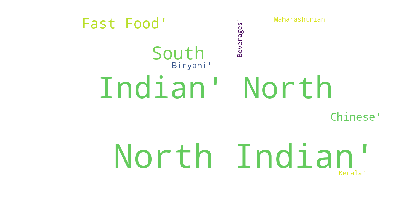

In [28]:
wordcloud = WordCloud(
        background_color='white',
        max_words=10,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(cuisineVsCity['cuisine'].values))
fig,axes = plt.pyplot.subplots()
#fig.set_size_inches(10,20)
axes.axis('off')
axes.imshow(wordcloud)

In [29]:
cuisineVsCity.groupby('cuisine').count()

,city,count
cuisine,,
Beverages,1,1
Biryani,2,2
Chinese,4,4
Fast Food,7,7
Kerala,1,1
Maharashtrian,1,1
North Indian,72,72
South Indian,11,11


### North indian cuisine most preferred in 72 cities followed by south indian cuisine in 11 cities.

## Is restaurant establishment type really important?

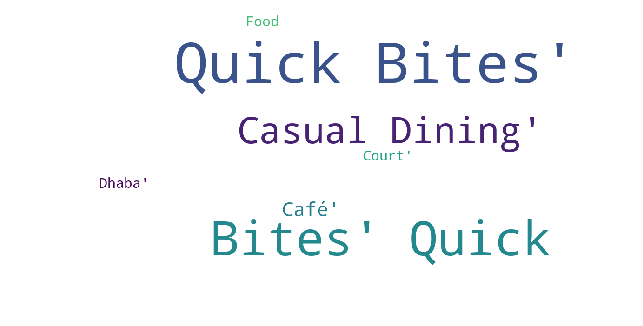

In [30]:
cityVsEstablishment = df.loc[:,['city','establishment','res_id']].groupby(['city','establishment'],as_index=False).count()
cityVsEstablishment.sort_values(['city','res_id'],ascending=False,inplace=True)
cityVsEstablishment = cityVsEstablishment.groupby('city').first()
wordcloud = WordCloud(
        background_color='white',
        max_words=10,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(cityVsEstablishment['establishment'].values))
fig,axes = plt.pyplot.subplots()
fig.set_size_inches(10,20)
axes.axis('off')
axes.imshow(wordcloud)

In [31]:
cityVsEstablishment['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Food Court']",
       "['Café']", "['Dhaba']", '[]'], dtype=object)